# **Introduction**

In this assignment, you will work with a dataset that includes information about the cost of treatment of different patients. The cost of treatment depends on many factors: diagnosis, type of clinic, city of residence, age and so on. We have no data on the diagnosis of patients. 

Columns

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

First, you will start by fitting a basic regression model using scikit-learn (sklearn) to establish a baseline for comparison. This basic regression model will serve as a reference point for evaluating the performance of more sophisticated models incorporating regularization techniques.

Furthermore, you will apply L1 (Lasso) and L2 (Ridge) regularization techniques to refine your predictions and evaluate the impact of these methods on the accuracy of your results. Regularization is a technique used to prevent overfitting by adding a penalty term to the loss function, encouraging simpler models with smaller coefficients. L1 regularization (Lasso) encourages sparsity by penalizing the absolute values of coefficients, while L2 regularization (Ridge) penalizes the square of coefficients. By incorporating these regularization techniques, you aim to improve the generalization performance of your regression models and obtain more robust predictions of house prices in the Boston area.

# Personal Data

In [ ]:
# Set your student number
student_number = ''
Name = ''
Last_Name = ''

## Imports

In [56]:
import os
import pandas
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
import numpy as np
import pandas as pd
import seaborn as sns
from joblib import dump, load
from matplotlib import pyplot as plt

# Load and Explore

Load the dataset (as a dataframe) using pandas and display the top 5 rows of the dataframe and then check for missing values and impute missing values with mean

In [40]:
file_path = "./InsuranceData.csv"
df = pd.read_csv(file_path)
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Get a brief description and do some EDA to get familiar with the dataset

In [3]:
# TODO: you can use .info() and .description()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

# Preprocessing

In [41]:
# TODO: apply any pre processing method you think is necessary, drop salary and convert to numpy array
# Options: Normalization, Standardization, Outlier Detection, Imputation, etc.

df['sex'] = LabelEncoder().fit_transform(df['sex'])
df['smoker'] = LabelEncoder().fit_transform(df['smoker'])

df['sex'] = df['sex'].astype(bool)
df['smoker'] = df['smoker'].astype(bool)

In [42]:
region = pd.get_dummies(df['region'])
df = pd.concat([df, region], axis = 1)
df.drop('region', axis = 1, inplace = True)

In [43]:
df.fillna(df.mean(), inplace=True)

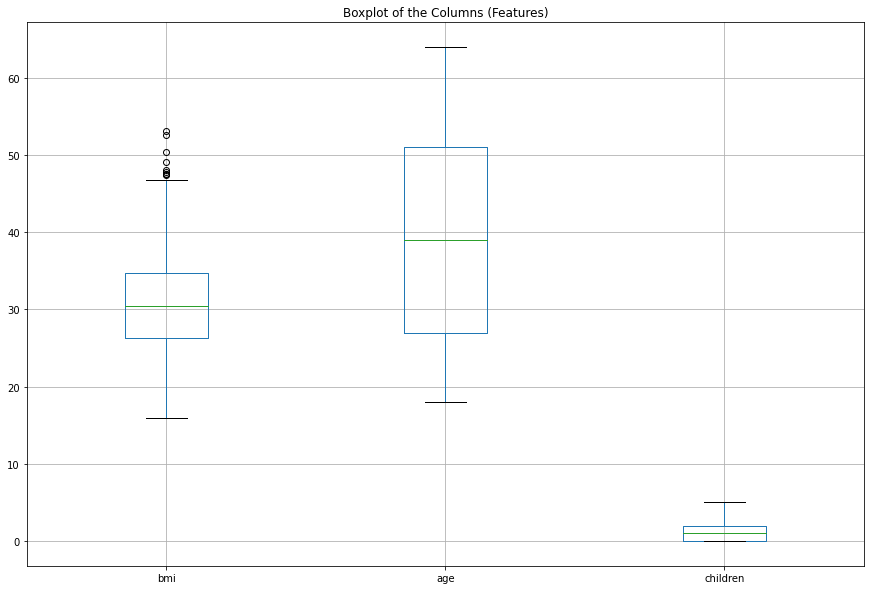

Total of 9 outliers detected. Data has been scaled.
[[-0.45332    -1.43876426 -0.90861367]
 [ 0.5096211  -1.50996545 -0.07876719]
 [ 0.38330685 -0.79795355  1.58092576]
 [-1.30553108 -0.4419476  -0.90861367]
 [-0.29255641 -0.51314879 -0.90861367]]


In [30]:
plt.figure(figsize=(15, 10))
plt.title("Boxplot of the Columns (Features)")

X = df[['bmi', 'age', 'children']]

X.boxplot()

plt.show()


Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
outliers = ((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).any(axis=1).sum()


if outliers > 0:
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    print(f"Total of {outliers} outliers detected. Data has been scaled.")
    print(X_scaled[:5])
else:
    print("No outliers detected.")

In [ ]:
# TODO: Split the dataset into two parts such that the training set contains 80% of the samples.

In [44]:
X = df.drop('charges', axis = 1)
y = df['charges']
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [45]:
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

# Training

Fit a linear regressor to the data. (Use sklearn)

In [46]:
# TODO: Use sklearn
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

Get the coefficients of the variables and visualize it

Coefficients of the variables in the sklearn:  [3512.06820376  -67.23495603 2102.36207733  534.98447119 9567.02930766
  293.97082059   14.19004575 -218.34542157  -90.24641655]


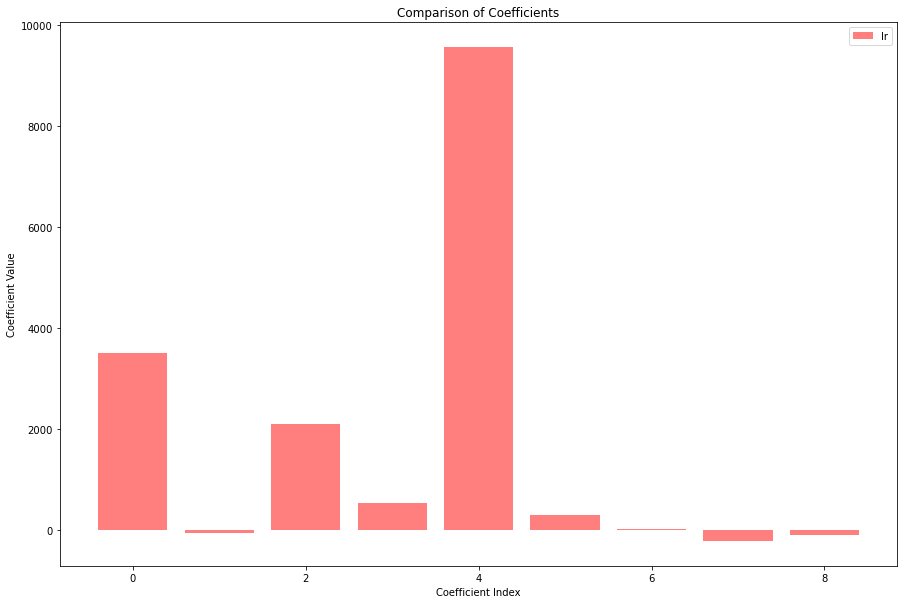

In [47]:
# TODO: 
def visualize_coef(model, label, color):
    print("Coefficients of the variables in the sklearn: ", model.coef_)

    plt.figure(figsize=(15, 10))
    plt.bar(range(len(model.coef_)), model.coef_, label=label, color=color, alpha=0.5)
    plt.xlabel("Coefficient Index")
    plt.ylabel("Coefficient Value")
    plt.title("Comparison of Coefficients")
    plt.legend()
    
    plt.show()
    
visualize_coef(lr, "lr", "r")

Get the score value of sklearn regressor on train dataset</br>
if you are not familiar with R-squared concept see the link below:
[R-squared](https://statisticsbyjim.com/regression/interpret-r-squared-regression/)



In [48]:
# TODO: Calculate R² score and MSE on the training dataset
# TODO: Calculate R² score and MSE on the training dataset
def calc_scores(model, X, y):
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    return r2, mse

r2, mse = calc_scores(lr, x_train, y_train)

print("R² score on the training dataset: ", r2)
print("MSE on the training dataset: ", mse)

R² score on the training dataset:  0.7461308747559303
MSE on the training dataset:  36754902.46433927


# Regularization

L1 regularization, also known as Lasso (Least Absolute Shrinkage and Selection Operator) regularization, is a technique used in regression models that encourages simplicity and sparsity in the model coefficients. This is achieved by adding a penalty equal to the absolute value of the magnitude of coefficients to the loss function.\
</br>
Train a regression model using L1 regularization.

In [49]:
# TODO: Use Lasso from sklearn library

lasso_lr = Lasso(alpha=0.5)
lasso_lr.fit(x_train, y_train)


lasso_lr_low_alpha = Lasso(alpha=0.1)
lasso_lr_low_alpha.fit(x_train, y_train)


lasso_lr_high_alpha = Lasso(alpha=2)
lasso_lr_high_alpha.fit(x_train, y_train)

Lasso(alpha=2)

Get the coefficients of the variables and visualize it.

Coefficients of the variables in the sklearn:  [3511.63998343  -66.68159041 2101.71217716  534.49878175 9566.43242717
  384.46709983  102.43789955 -127.01777734   -0.        ]


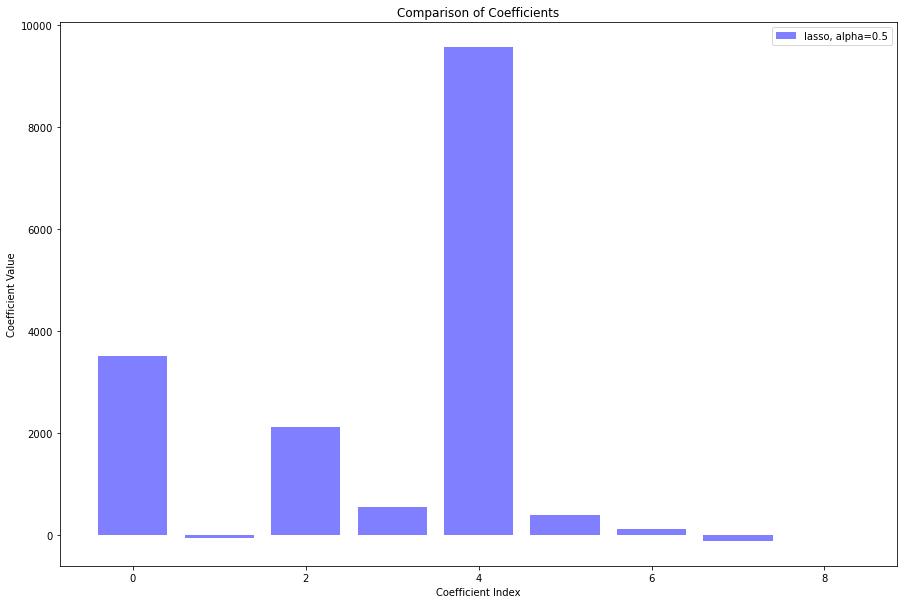

Coefficients of the variables in the sklearn:  [3511.98281679  -67.12388931 2102.23014415  534.88638109 9566.91078495
  384.8730222   102.90953736 -127.27048142   -0.        ]


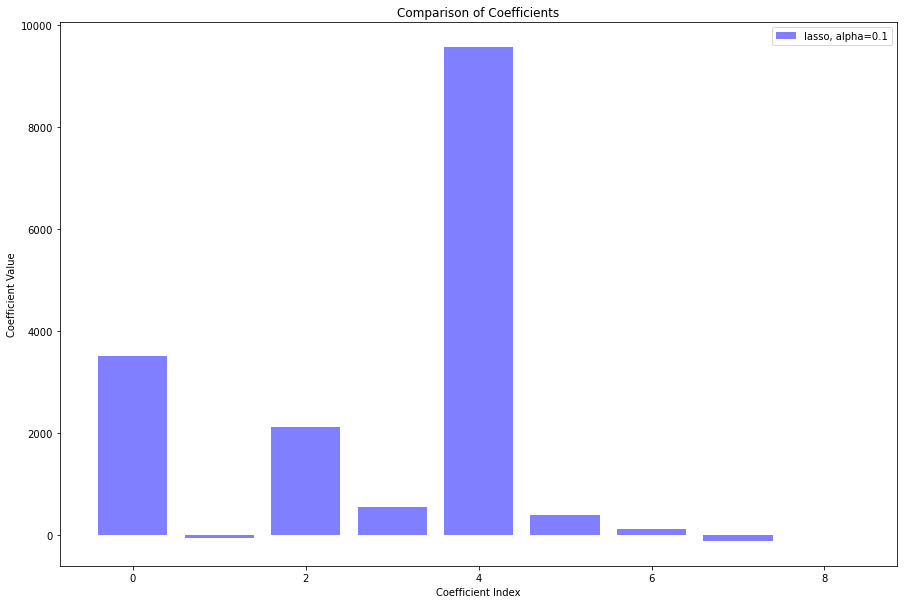

Coefficients of the variables in the sklearn:  [3510.36345453  -65.00904362 2099.70069714  533.01159424 9564.66877898
  382.41452468  100.26617858 -126.37174809   -0.        ]


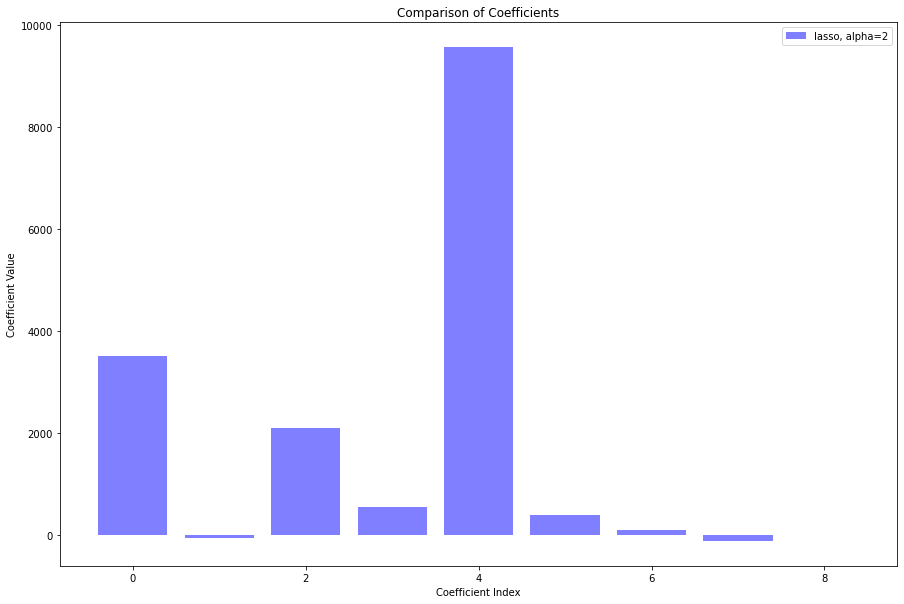

In [50]:
visualize_coef(lasso_lr, "lasso, alpha=0.5", "b")
visualize_coef(lasso_lr_low_alpha, "lasso, alpha=0.1", "b")
visualize_coef(lasso_lr_high_alpha, "lasso, alpha=2", "b")

Train a regression model using L2 regularization.

In [51]:
# TODO: Use Ridge from sklearn library
Ridge_lr = Ridge(alpha=0.5)
Ridge_lr.fit(x_train, y_train)


Ridge_lr_low_alpha = Ridge(alpha=0.1)
Ridge_lr_low_alpha.fit(x_train, y_train)


Ridge_lr_high_alpha = Ridge(alpha=2)
Ridge_lr_high_alpha.fit(x_train, y_train)

Ridge(alpha=2)

Coefficients of the variables in the sklearn:  [3510.41777734  -66.93062916 2101.3936194   534.76553563 9562.44226998
  293.7997166    13.98775785 -217.82234731  -90.40225183]


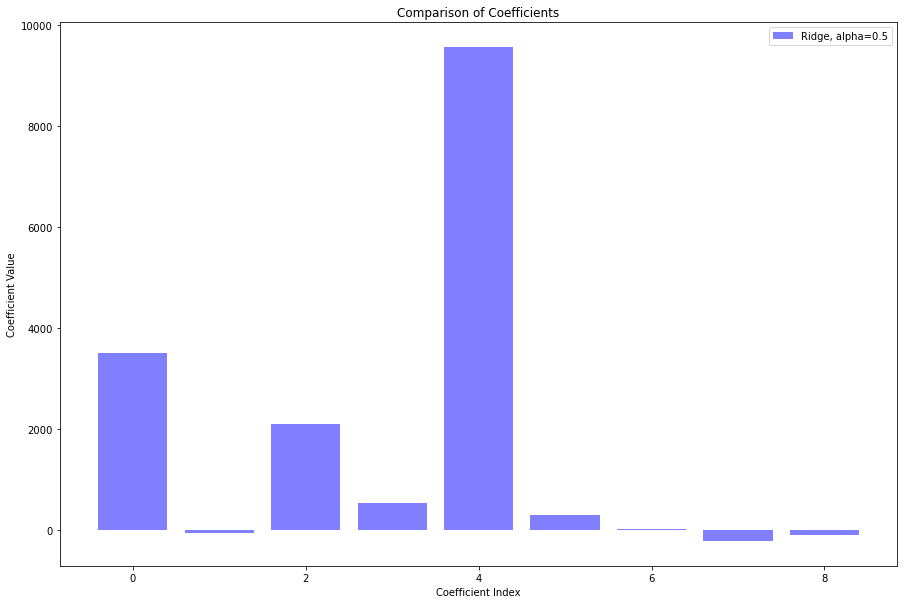

Coefficients of the variables in the sklearn:  [3511.73799513  -67.17404715 2102.1683057   534.94067091 9566.11154401
  293.93658435   14.14956107 -218.24074194  -90.2776067 ]


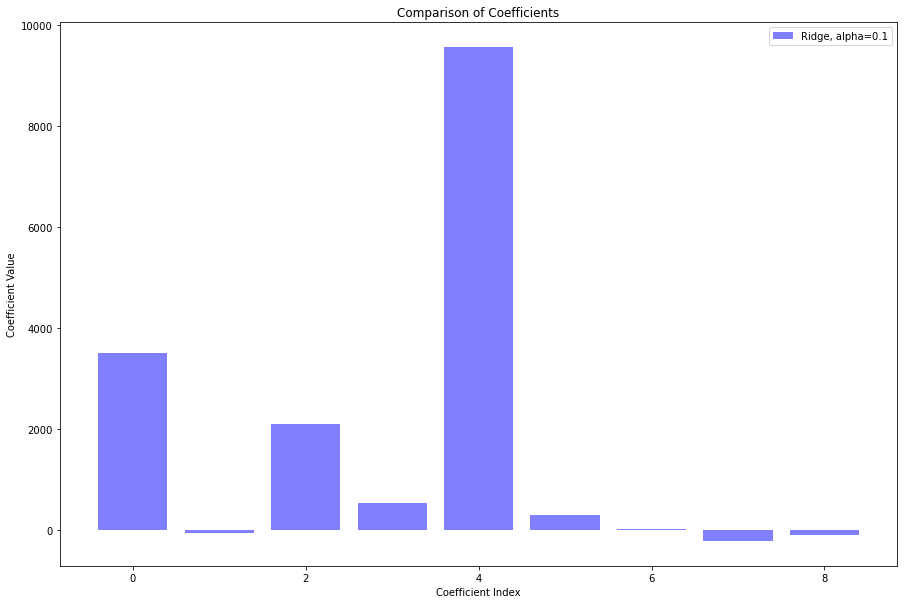

Coefficients of the variables in the sklearn:  [3505.47573309  -66.02090292 2098.49423613  534.10971562 9548.70781587
  293.28756056   13.38292119 -216.25797174  -90.86803028]


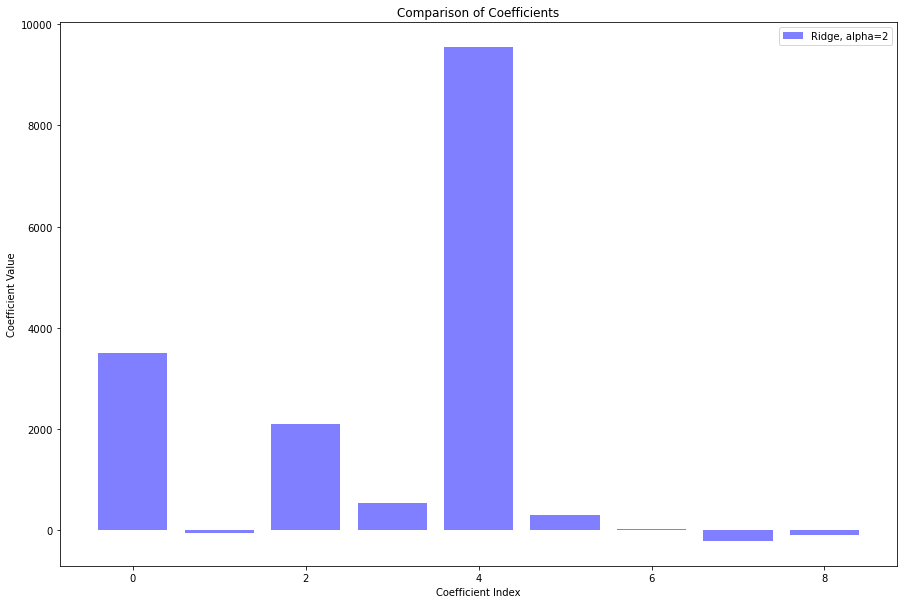

In [53]:
visualize_coef(Ridge_lr, "Ridge, alpha=0.5", "b")
visualize_coef(Ridge_lr_low_alpha, "Ridge, alpha=0.1", "b")
visualize_coef(Ridge_lr_high_alpha, "Ridge, alpha=2", "b")

Test different regularization parameters (alpha) using cross validation. Use MAPE for evaluation.

In [57]:
# TODO: Use folding methods from sklearn library
kf = KFold(n_splits=5, shuffle=True, random_state=42)

alphas = [0.1, 1, 10, 100]
results = {}

for alpha in alphas:
    model = Ridge(alpha=alpha)
    scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_absolute_percentage_error')
    results[alpha] = np.mean(np.abs(scores))

print("Cross-validated MSE for different alphas:", results)

Cross-validated MSE for different alphas: {0.1: 0.4245892805271505, 1: 0.42607984927701625, 10: 0.4420153452587171, 100: 0.6000178841960493}


In [58]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

alphas = [0.1, 1, 10, 100]
results = {}

for alpha in alphas:
    model = Lasso(alpha=alpha)
    scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_absolute_percentage_error')
    results[alpha] = np.mean(np.abs(scores))

print("Cross-validated MSE for different alphas:", results)

Cross-validated MSE for different alphas: {0.1: 0.42442558802195557, 1: 0.4244699861313177, 10: 0.42478738463722643, 100: 0.43195954784776147}


Add extra variables to dataset to make model more complex, then compare the results. 

In [103]:
# TODO: Increase No. of dimensions using PolynomialFeatures from sklearn 
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(X_poly, y, train_size=0.8)
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

lr = LinearRegression()
lr.fit(x_train, y_train)
mean_absolute_percentage_error(y_test, lr.predict(x_test))

0.28963086945730804

Coefficients of the variables in the sklearn:  [ 3.21234437e-13 -2.02001540e+16  9.54711714e+15 -5.40488180e+15
 -9.40490045e+15  2.36560696e+15 -2.71109917e+16 -1.50018347e+16
 -1.77774884e+16 -1.40450525e+16  4.38200000e+03  5.64312500e+02
  1.05550000e+03 -1.20343750e+03  2.42000000e+02  2.55837614e+16
  2.60572086e+16  2.72811268e+16  2.59842698e+16  3.30469480e+15
 -2.06500000e+02 -1.74500000e+02 -3.81000000e+02 -8.37097656e+15
 -8.22892056e+15 -9.14416828e+15 -8.48168375e+15 -1.81000000e+03
 -3.10000000e+01  1.99065000e+04  1.12774658e+16  1.14853093e+16
  1.38341014e+16  1.20534769e+16 -2.18000000e+02 -4.45000000e+02
  5.41559564e+15  5.82695564e+15  6.12625098e+15  6.48808381e+15
 -3.25569931e+15  4.55125481e+14  4.59616906e+14  5.74957121e+14
  4.41319659e+14 -8.94072498e+15  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -2.12990020e+16  0.00000000e+00  0.00000000e+00
 -2.05845004e+16  0.00000000e+00 -2.28292267e+16]


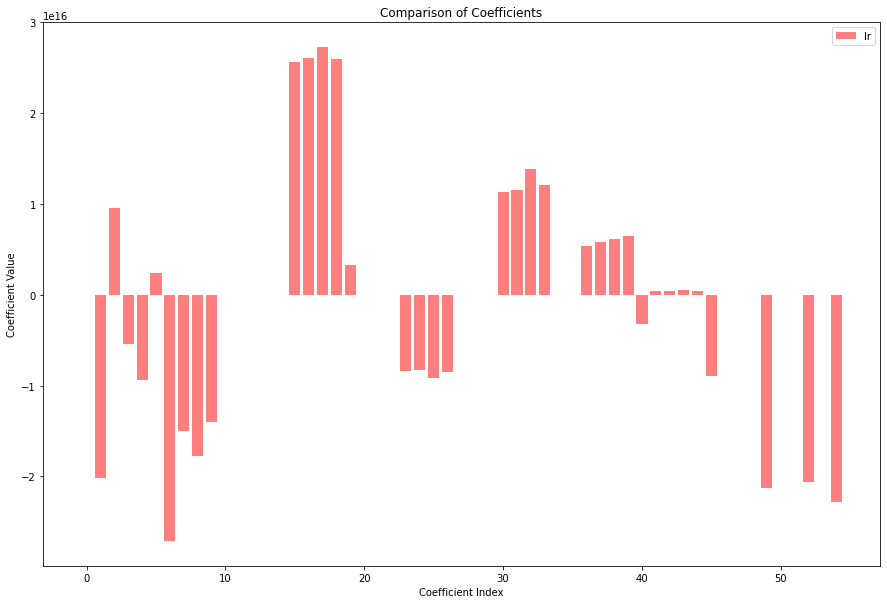

In [109]:
# TODO:     
visualize_coef(lr, "lr", "r")

In [106]:
lasso = Lasso(alpha=10)
lasso.fit(x_train, y_train)
mean_absolute_percentage_error(y_test, lasso.predict(x_test))

0.2863161338093014

Coefficients of the variables in the sklearn:  [ 0.00000000e+00 -0.00000000e+00 -2.74625613e+02  1.83958943e+03
  1.02035911e+03 -4.43621736e+01  0.00000000e+00 -2.63220757e+02
  3.42307912e+02 -0.00000000e+00  3.74265952e+03  4.69388044e+02
  0.00000000e+00  0.00000000e+00 -5.30022608e+01 -7.34340734e+02
 -3.18905823e+02  2.40117087e+02  0.00000000e+00 -1.75200221e-02
 -2.52270287e+02 -1.56633061e+02 -4.34978547e+01 -2.39231482e+02
 -2.72796096e+00  0.00000000e+00 -0.00000000e+00 -1.86762983e+03
  7.31519065e+01  1.88298065e+04  1.20882942e+03  9.43732412e+02
 -4.82297834e+02 -0.00000000e+00 -2.11039941e+02 -3.15017784e+02
  1.88643650e+02  3.14556136e+02  0.00000000e+00 -1.93638240e+02
 -8.10278994e+03 -0.00000000e+00 -3.60650833e+02 -3.98401880e+02
  1.64869237e+01  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -2.88718081e+02  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00]


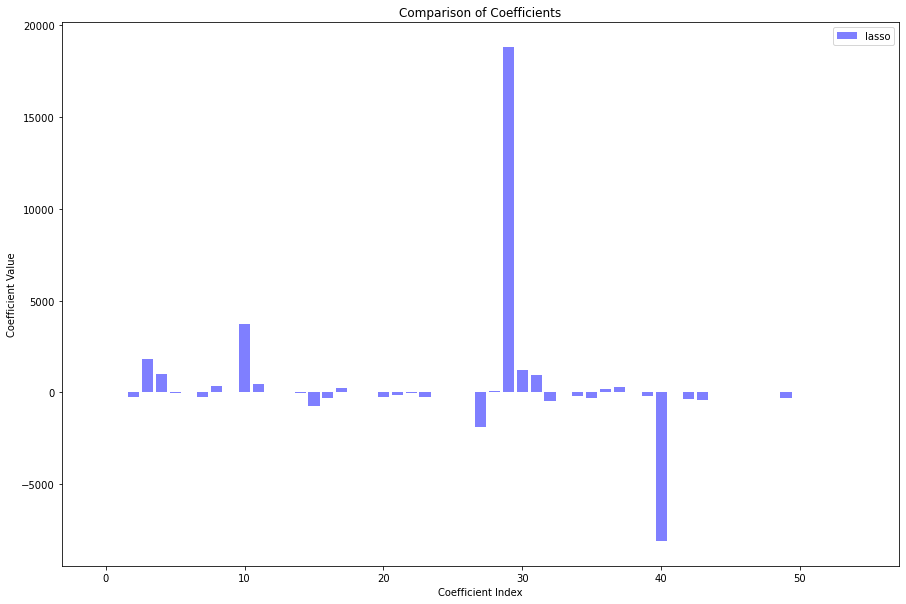

In [110]:
visualize_coef(lasso, "lasso", "b")

In [107]:
Ridge = Ridge(alpha=10)
Ridge.fit(x_train, y_train)
mean_absolute_percentage_error(y_test, Ridge.predict(x_test))

0.2832721501486185

Coefficients of the variables in the sklearn:  [    0.           151.42706805  -218.5051542   1612.58325962
   493.45266441 -1622.33735942    71.38420483  -240.27740679
   138.22565055    22.94653411  3046.73872097   511.40312092
   370.37847988    51.60413292  -156.01899184  -517.36863382
   -71.6006986    420.6586513    257.2617271   -218.5051542
  -112.0300251   -120.60826879    60.25033503  -229.65380329
   -25.91147438   -43.8670608    -31.99945942 -1398.26834902
   397.50098051 14863.04009463   950.07853196   742.92519782
  -580.48487945  -207.48330889  -295.58115477  -318.92416804
   338.56351896   446.80400855   104.18855696   -66.96003523
 -1622.33735942  -665.52235587  -940.33247761  -873.53050342
  -468.36480352    71.38420483     0.             0.
     0.          -240.27740679     0.             0.
   138.22565055     0.            22.94653411]


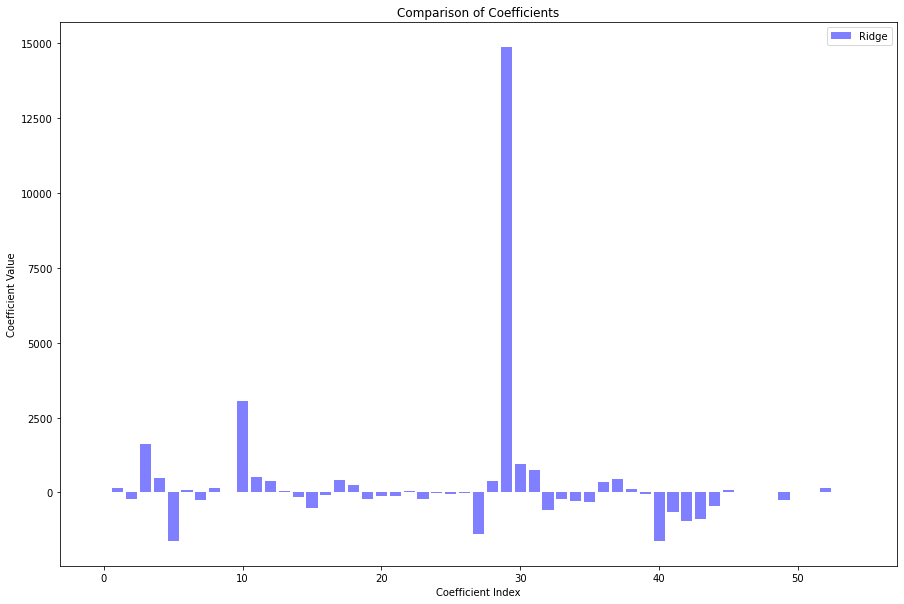

In [111]:
visualize_coef(Ridge, "Ridge", "b")

Report your best model with its evaluated results.

In [112]:
# TODO:

## Questions

1. Compare the weight distribution when applying L1/L2 regularization and their sparsity?

2. How does the regularization parameter (alpha) affect each feature? Does it help to model's explainability?

3. How does the regularization affect dimension expansion?

## Sample Answers

1. As we know L1 regularization's main feature is sparsity. It means that it pushes the coefficients of the linear regression to be zero. We can see that feature just by comparing the plots of the normal LR and the Lasso. Many of the coefficients in the Lasso are zero or at least near zero (As we are adding a penalty equal to the absolute value of the coefficients, our model tends to have smaller coefficients and thus we'll have many zero values between them). 

    In the first glance we can see the difference between their sparsity. When we use the Lasso our coefficients have more sparsity and most of them are zero or at least so close to zero, but in the Ridge our coefficients are not forced to be exactly zero, they're just pushed to be small and not necessarily zero. This also indicates a feature selection act that is done by the Lasso. Lasso tends to kinda ignore the less important features and gives them zero coefficients and by that it acts as a feature selector, but the Ridge doesn't act like that and gives all of the features their corresponding coefficients to just ensure that the L2 norm is small.

    So basically their key differences are the sparsity that Lasso has compared to the Ridge (Lasso pushes the coefficients to be small and mostly zero, but Ridge just pushes them to be small) and also the feature selection act that Lasso has (and Ridge doesn't have) when dealing w/ the features.



2. As alpha increases, the coefficients of features are penalized more heavily. In Ridge regression (L2 regularization), all coefficients are shrunk but remain non-zero, while in Lasso regression (L1 regularization), some coefficients can be completely reduced to zero, effectively performing feature selection. This means that different features can be affected differently based on their relevance to the target variable and their correlation with other features.

    By shrinking coefficients, especially in Lasso regression, regularization can enhance model interpretability. A model with fewer non-zero coefficients is easier to explain and understand since it highlights only the most relevant features. This is particularly beneficial in high-dimensional datasets where many features may contribute little to the predictive power.

    Models with appropriate regularization tend to produce more stable coefficient estimates across different datasets or samples. This stability aids in understanding which features consistently contribute to predictions, enhancing overall explainability

3. Regularization helps control overfitting by penalizing large coefficients in the model. In high-dimensional spaces, models can easily become overly complex and fit noise rather than the underlying data structure. By introducing a penalty term (controlled by alpha), regularization restricts the complexity of the model, effectively managing the dimensionality of the feature space.

    Ridge regression (L2 regularization) does not eliminate coefficients but shrinks them towards zero. This shrinkage stabilizes coefficient estimates, particularly in high-dimensional settings where multicollinearity may be present. Stable coefficients mean that small changes in the data do not lead to large fluctuations in the model, which is crucial when dealing with expanded dimensions.

    Regularization introduces bias into the model but reduces variance by limiting how much coefficients can change based on fluctuations in the training data. This tradeoff is essential when working with high-dimensional data, as it helps maintain predictive performance while controlling for overfitting.